In [188]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [190]:
import sys
import os
import pandas as pd
import seaborn as sns
import  numpy as np
from train_test_split import train_test_splitting
from config import DATA_FILE, EMPTY_HIST_THRESHOLD_PROCEDURE, EMPTY_HIST_THRESHOLD_CONDITION, EMPTY_HIST_THRESHOLD_MEDICATION
from helper import *

df = pd.read_csv(DATA_FILE)
df.fillna(value='', inplace=True)

convert_string_to_list(df, 'Procedure')
convert_string_to_list(df, 'Condition')
convert_string_to_list(df, 'Medication')

empty_cacl_list = ['Condition', 'Procedure', 'Medication']
uniqe_Conditions = set().union(*df['Condition'])
uniqe_Procedures = set().union(*df['Procedure'])
uniqe_Medication = set().union(*df['Medication'])

def is_non_empty_list(x):
    return isinstance(x, list) and len(x) > 0

# Apply the function to the specified columns and create a mask
columns_of_interest = ['Condition', 'Procedure', 'Medication']
mask = df[columns_of_interest].applymap(is_non_empty_list)

# Select rows where all specified columns contain non-empty lists
df_non_empty = df[mask.any(axis=1)]

print(f'Lengths: Data : {len(df)}, None empty rows: {len(df_non_empty)}\n',
f'Uniqe Conditions: {len(uniqe_Conditions)}, uniqe_Procedures: {len(uniqe_Procedures)}, uniqe Medication:{len(uniqe_Medication)}')
calc_empty(df, empty_cacl_list)

Lengths: Data : 16406, None empty rows: 13744
 Uniqe Conditions: 3231, uniqe_Procedures: 93, uniqe Medication:17
| Column     |   Empty percentage |
|------------|--------------------|
| Condition  |              19.6  |
| Procedure  |              76.6  |
| Medication |              95.63 |


/tmp/ipykernel_38314/161055459.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df[columns_of_interest].applymap(is_non_empty_list)


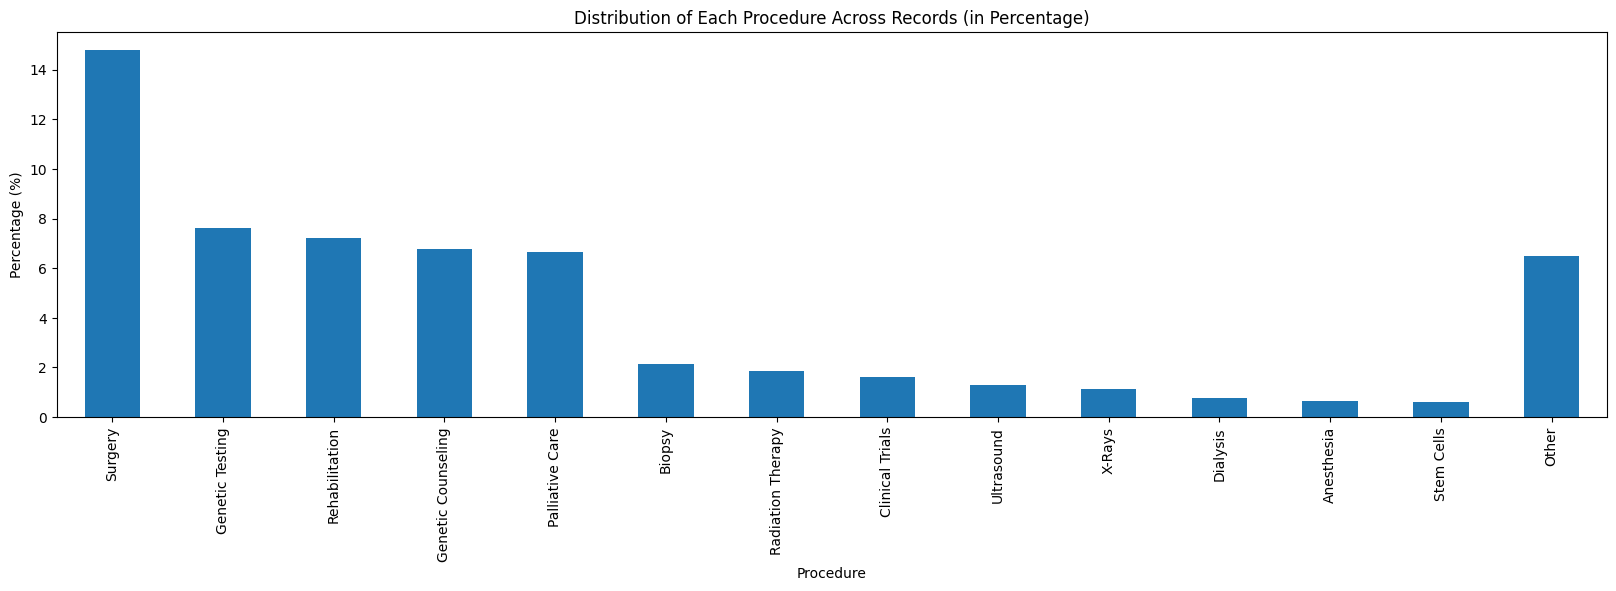

In [169]:
calc_hist(df, 'Procedure', EMPTY_HIST_THRESHOLD_PROCEDURE,other_bar=True)

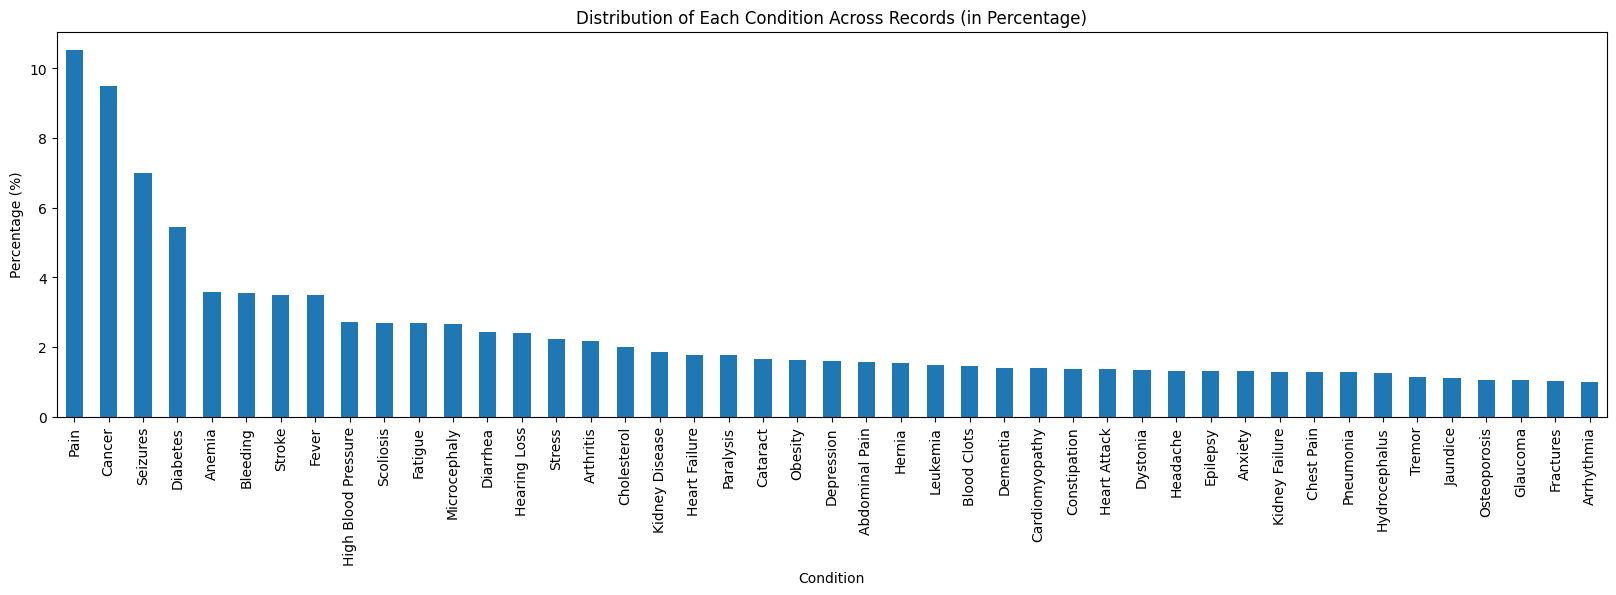

In [170]:
calc_hist(df, 'Condition', EMPTY_HIST_THRESHOLD_CONDITION, other_bar=False)

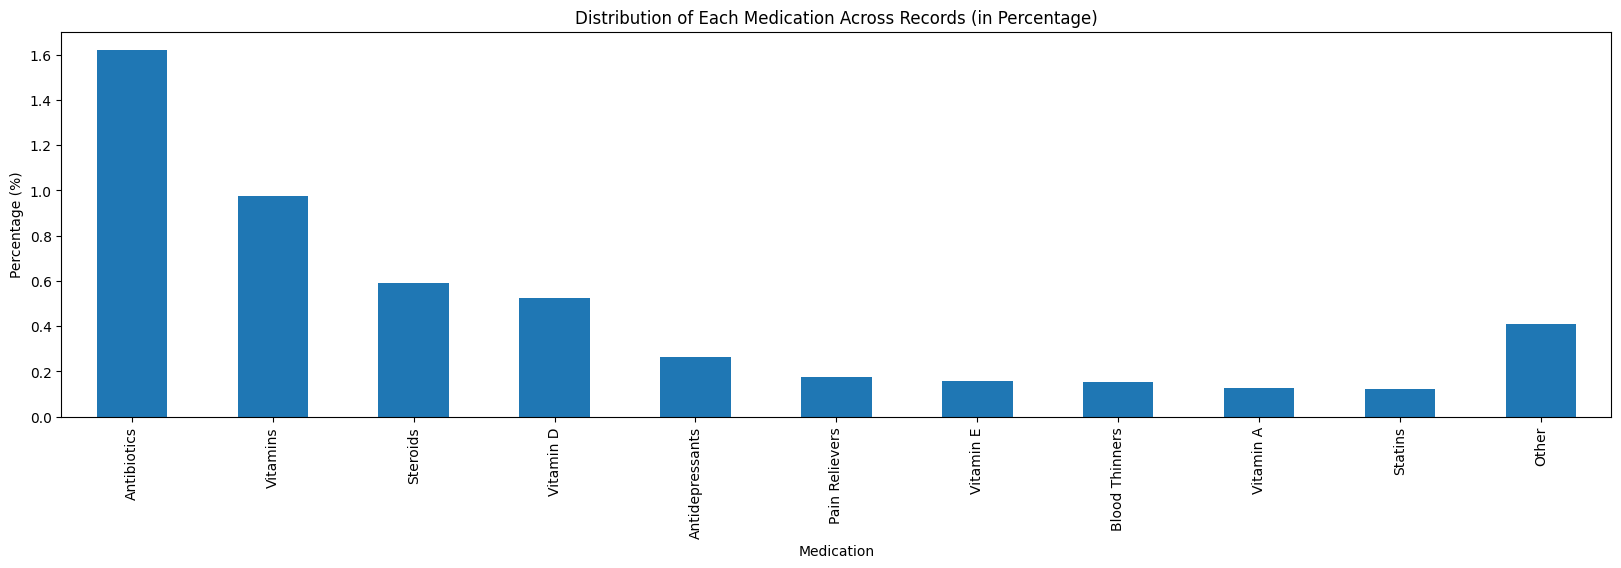

In [171]:
calc_hist(df, 'Medication', EMPTY_HIST_THRESHOLD_MEDICATION,other_bar=True)

# Text

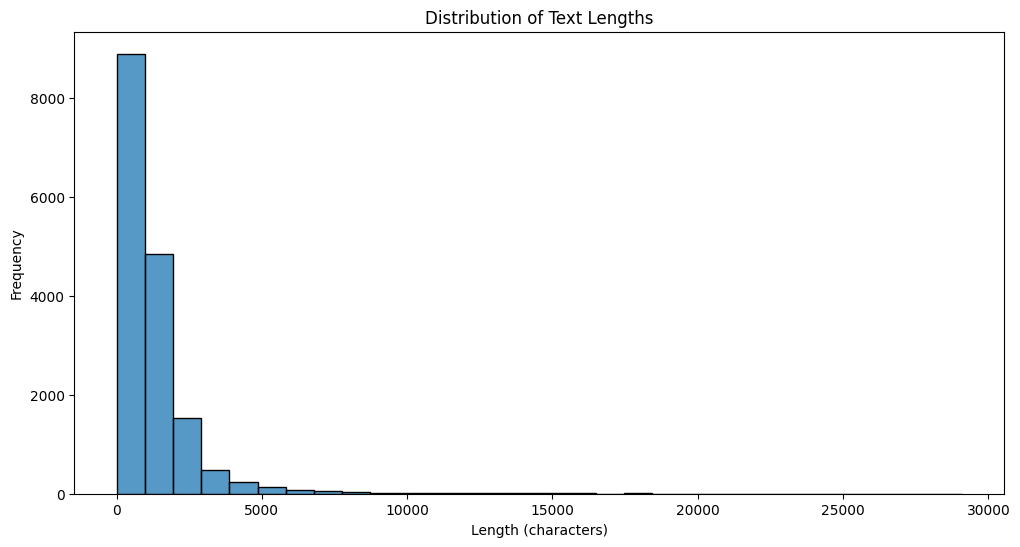


Average text length: 1303.82 characters
Median text length: 888.0 characters
Min text length: 6 characters
Max text length: 29094 characters


In [172]:
# Text length analysis
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.show()

print(f"\nAverage text length: {df['text_length'].mean():.2f} characters")
print(f"Median text length: {df['text_length'].median()} characters")
print(f"Min text length: {df['text_length'].min()} characters")
print(f"Max text length: {df['text_length'].max()} characters")

In [174]:
for idx, row in df.iterrows():
    tot_row_ent = set()
    
    for col_ent in ['Condition', 'Procedure', 'Medication']:
        col_count = col_ent + '_counts'

        if row[col_count]:
            tot_row_ent.update(row[col_ent])  # flatten list into the set
        else:
            tot_row_ent.update(row[col_ent])  # do the same even if it's zero (can skip if needed)

    print('-'*30 +' ' + str(tot_row_ent) +' ' + '-'*30)
    print(row['text'])
    print('\n')
    if idx == 5:
        break

------------------------------ {'Urinary Tract Infections', 'Glaucoma', 'High Blood Pressure'} ------------------------------
glaucoma and also High Blood Pressure and alcohol and urinary tract infections


------------------------------ {'Glaucoma'} ------------------------------
Nearly 2.7 million people have glaucoma, a leading cause of blindness in the United States. Although anyone can get glaucoma, some people are at higher risk. They include - African-Americans over age 40  - everyone over age 60, especially Hispanics/Latinos  - people with a family history of glaucoma. African-Americans over age 40 everyone over age 60, especially Hispanics/Latinos people with a family history of glaucoma.  In addition to age, eye pressure is a risk factor. Whether you develop glaucoma depends on the level of pressure your optic nerve can tolerate without being damaged. This level is different for each person. Thats why a comprehensive dilated eye exam is very important. It can help your eye ca

# Check if the exact words match in the text

In [175]:
calc_exact_match(df)

Final Statistics:
Total rows processed: 13744
Rows with 100% match: 13744 (100.00%)
Average match percentage across rows: 100.00%


In [176]:
uniqe_phrases = set().union(*df['Condition']).union(*df['Procedure']).union(*df['Medication'])

matches = []

# Compare each phrase with all the others
for i, phrase in enumerate(uniqe_phrases):
    for j, other_phrase in enumerate(uniqe_phrases):
        if i != j:  # Ensure we don't compare the phrase with itself
            # Check using lower() to perform a case-insensitive search.
            if phrase.lower() in other_phrase.lower():
                matches.append((phrase, other_phrase))
                
print(f'percentage of phrase inside another phrase: {len(matches)}/{len(uniqe_phrases)} = {round(len(matches)/len(uniqe_phrases),2)}')

percentage of phrase inside another phrase: 1142/3341 = 0.34


In [177]:
counts = 0
for idx, row in df.iterrows():
    tot_row_ent = set()
    
    for col_ent in ['Condition', 'Procedure', 'Medication']:
        col_count = col_ent + '_counts'

        if row[col_count]:
            tot_row_ent.update(row[col_ent])  # flatten list into the set
        else:
            tot_row_ent.update(row[col_ent])  # do the same even if it's zero (can skip if needed)

    if 'Bone Cancer' in row['text']:
        print('-'*30 +' ' + str(tot_row_ent) +' ' + '-'*30)
        print(row['text'])
        print('\n')
        counts += 1
        if counts == 1:
            break

------------------------------ {'Clinical Trials', 'Radiation Therapy', 'Bone Cancer', 'Rehabilitation', 'Pain', 'Osteosarcoma and Malignant Fibrous Histiocytoma of Bone', 'Surgery', 'X-Rays', 'Cancer', 'Stem Cells'} ------------------------------
Key Points
                    - There are different types of treatment for patients with osteosarcoma or malignant fibrous histiocytoma (MFH) of bone.    - Children with osteosarcoma or MFH should have their treatment planned by a team of health care providers who are experts in treating cancer in children.     - Treatment for osteosarcoma or malignant fibrous histiocytoma may cause side effects.    - Four types of standard treatment are used:         - Surgery     - Chemotherapy     - Radiation therapy     - Samarium        - New types of treatment are being tested in clinical trials.          - Targeted therapy         - Patients may want to think about taking part in a clinical trial.    - Patients can enter clinical trials before, during

In [178]:
df2 = df.copy()


def substring_entity_analysis(row):
    # Combine phrases from the three columns.
    phrases = []
    for col in ['Condition', 'Procedure', 'Medication']:
        cell = row[col]
        if isinstance(cell, list):
            phrases.extend(cell)
        elif pd.notnull(cell):
            phrases.append(cell)
    
    # Remove duplicates.
    phrases = list(set(phrases))
    
    # Count how many entities (phrases) are a substring of another
    substring_entity_count = 0
    for i in range(len(phrases)):
        current_phrase = phrases[i].lower()
        # Check if this phrase is contained in any other phrase.
        for j in range(len(phrases)):
            if i != j:
                if current_phrase in phrases[j].lower():
                    substring_entity_count += 1
                    break  # Stop after the first match
    total_entities = len(phrases)
    percent_entity = (substring_entity_count / total_entities * 100) if total_entities > 0 else 0

    return pd.Series({
        'substring_entities_count': substring_entity_count,
        'total_entities': total_entities,
        'percent_substring_entities': percent_entity,
        'row_has_substring': substring_entity_count > 0
    })

# Apply the per-row analysis.
results = df2.apply(substring_entity_analysis, axis=1)
df2 = pd.concat([df2, results], axis=1)

# Compute overall statistics:
# 1. Percentage of rows that contain at least one substring entity.
percentage_rows = df2['row_has_substring'].mean() * 100

# 2. Overall percentage of substring entities among all entities.
total_substring_entities = df2['substring_entities_count'].sum()
total_entities = df2['total_entities'].sum()
overall_percent_entities = (total_substring_entities / total_entities * 100) if total_entities > 0 else 0

# Output results.
print("Number of rows:", len(df2))
print(f"Rows with at least one substring entity: {df2['row_has_substring'].sum()} ({percentage_rows:.2f}%)")
print(f"Overall percentage of substring entities among all entities: {overall_percent_entities:.2f}%")

Number of rows: 16406
Rows with at least one substring entity: 3679 (22.42%)
Overall percentage of substring entities among all entities: 8.46%


In [179]:
df.iloc[23:28]

,text,Condition,Procedure,Medication,Procedure_counts,Condition_counts,Medication_counts,text_length,entity_type_count
23,You can take steps to help prevent high blood ...,"[High Blood Pressure, Stress]",[Healthy Aging],[],0.0,2.0,0.0,2904,2
24,"If you are diagnosed with high blood pressure,...",[High Blood Pressure],[],[Vitamins],0.0,0.0,0.0,4907,2
25,High blood pressure is treated with lifestyle ...,[High Blood Pressure],[],[],0.0,0.0,0.0,423,1
26,"In most cases, the goal is probably to keep yo...","[High Blood Pressure, Diabetes, Kidney Disease...",[],[],0.0,4.0,0.0,442,1
27,"Today, many different types of medicines are a...",[High Blood Pressure],[],[Blood Pressure Medicines],0.0,0.0,0.0,3752,2


In [191]:
train_test_splitting()
X_train, y_train, X_test, y_test = read_train_test_split()

In [192]:
balance_results = calculate_entity_balance(y_train, y_test)
print_balance_results(balance_results)

--------------------------------------------------------------------------------
Entity Type     Balance Score % Overlap %       Normallized EMD % KS Stat %         
--------------------------------------------------------------------------------
Condition       59.5%              38.5%(1244/3231)  0.0%           53.0%
Procedure       75.1%              69.9%(65/93)      0.0%           28.0%
Medication      84.9%              94.1%(16/17)      1.0%           24.0%


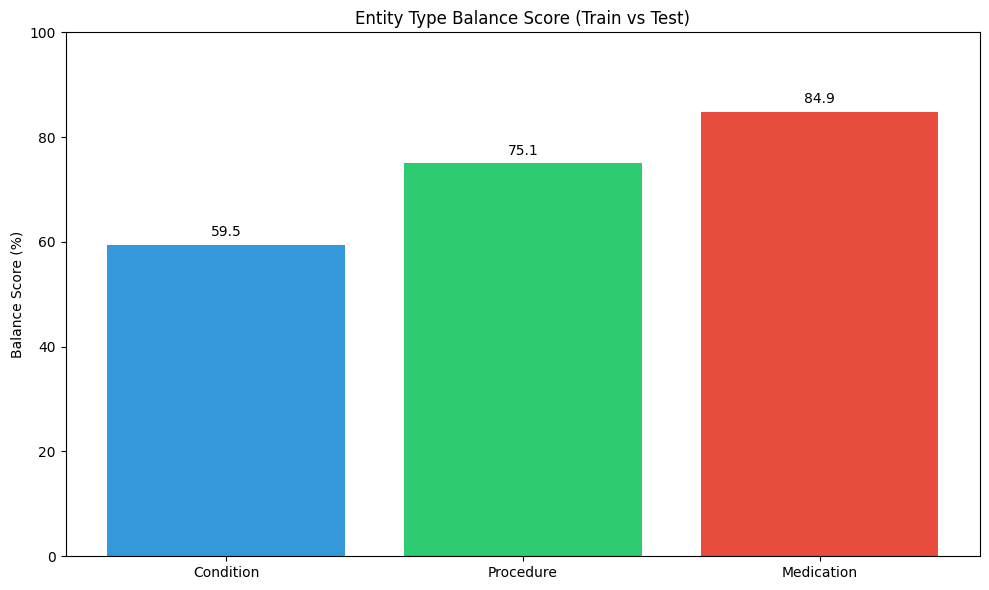

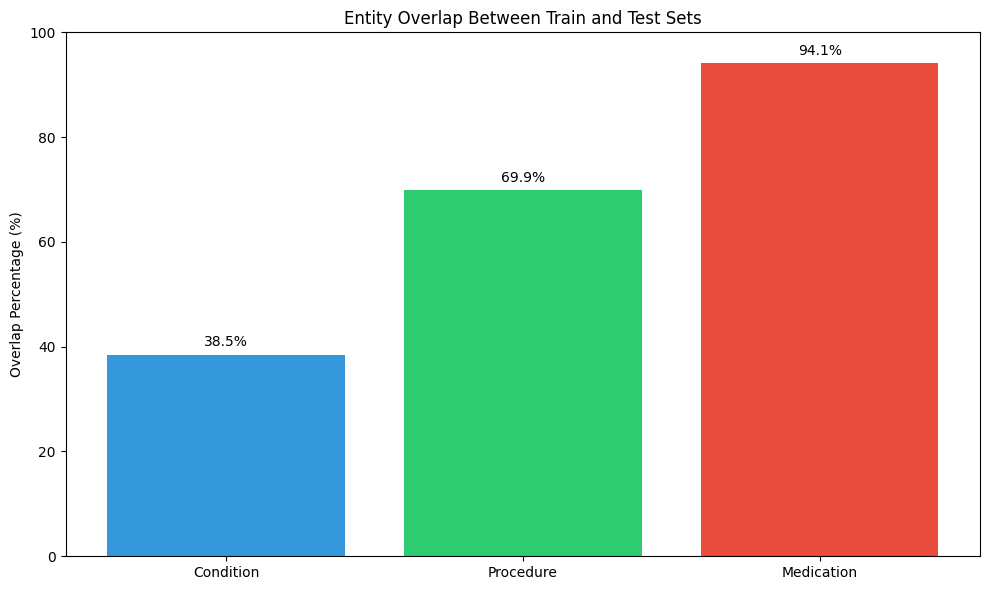

In [193]:
create_balance_visualization(balance_results)

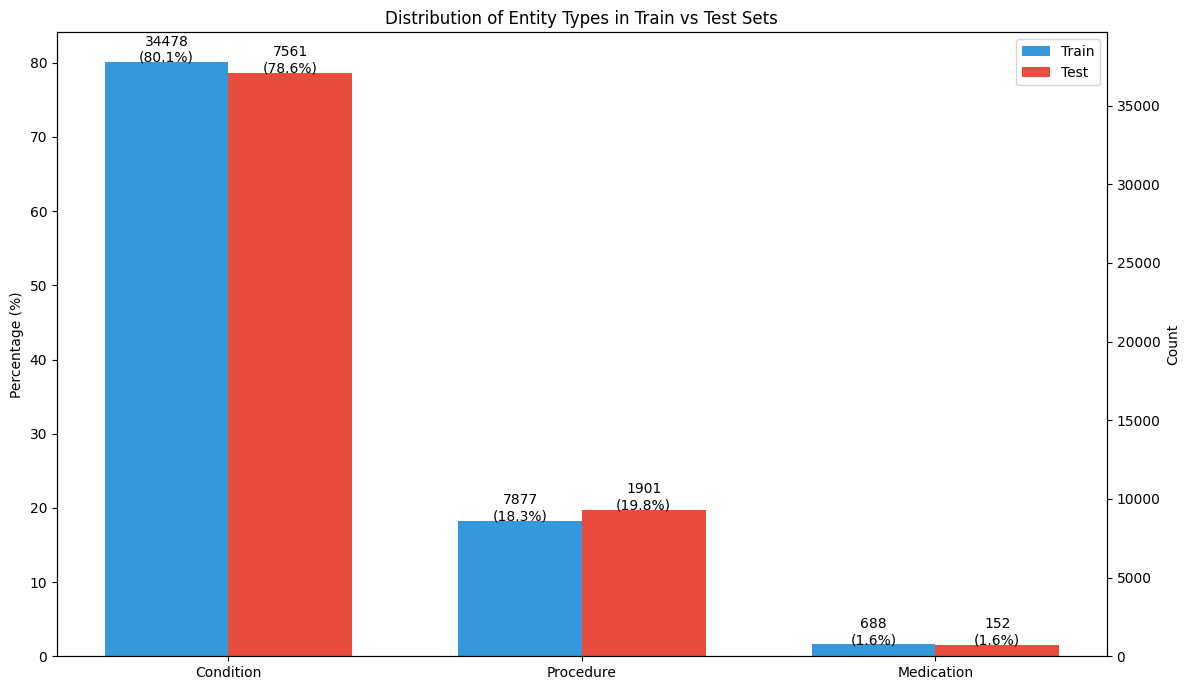

In [194]:
plot_entity_distributions(y_train, y_test)